<a href="https://colab.research.google.com/github/gkakani1/GOUTHAM-DATA606/blob/main/Code/ML_Model/CLASSIFICATION/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import glob
import pandas as pd
import re 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Capstone/Datasets/Final_Datasets/Final_Dataset.xlsx')

In [ ]:
df.head(10)

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State,Crop,Price,INR,Std_Price
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BITTER GOURD,2567.0,45.430458,56.503943
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BITTER GOURD,2175.0,45.430458,47.875370
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BRINJAL LONG,1906.0,45.430458,41.954232
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BRINJAL LONG,824.0,45.430458,18.137612
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CAULIFLOWER,736.0,45.430458,16.200585
5,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CAULIFLOWER,873.0,45.430458,19.216183
6,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CHILLY,2130.0,45.430458,46.884845
7,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CHILLY,1404.0,45.430458,30.904377
8,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,OKRA,3550.0,45.430458,78.141409
9,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,OKRA,2225.0,45.430458,48.975953


In [ ]:
df.describe()

,Year,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Price,INR,Std_Price
count,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000,22120.000000
mean,2015.571790,95.537795,46.243301,0.590660,0.591723,0.484146,1.981458,11.035201,12.689427,34.647427,15.021687,5.567863,0.139399,2003.912948,63.031940,31.801049
std,2.827852,19.663401,23.554037,0.147721,0.151029,0.231190,2.564072,5.045790,8.200002,6.976530,7.701061,1.579558,0.114041,1156.331830,8.003309,17.795752
min,2011.000000,37.190000,4.380000,0.280000,0.280000,0.090000,0.000000,2.500000,-6.790000,14.800000,-6.990000,1.180000,0.000000,163.000000,44.368860,2.433326
25%,2013.000000,82.820000,26.650000,0.500000,0.500000,0.280000,0.090000,6.650000,6.137500,30.650000,9.060000,4.510000,0.060000,1155.000000,59.734803,18.614767
50%,2016.000000,93.650000,40.260000,0.600000,0.590000,0.480000,0.730000,9.830000,12.490000,34.050000,15.800000,5.480000,0.110000,1744.500000,64.443494,28.122444
75%,2018.000000,109.470000,65.960000,0.660000,0.670000,0.670000,3.150000,15.930000,20.560000,40.100000,21.410000,6.540000,0.180000,2587.000000,68.259341,40.604722
max,2020.000000,141.410000,95.810000,0.960000,0.980000,0.950000,9.840000,21.850000,26.480000,48.770000,30.160000,9.900000,0.640000,6500.000000,76.251620,131.188441


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22120 entries, 0 to 22119
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                22120 non-null  int64  
 1   Month               22120 non-null  object 
 2   ALLSKY_SFC_PAR_TOT  22120 non-null  float64
 3   CLOUD_AMT           22120 non-null  float64
 4   GWETPROF            22120 non-null  float64
 5   GWETROOT            22120 non-null  float64
 6   GWETTOP             22120 non-null  float64
 7   PRECTOTCORR         22120 non-null  float64
 8   QV2M                22120 non-null  float64
 9   T2MDEW              22120 non-null  float64
 10  T2M_MAX             22120 non-null  float64
 11  T2M_MIN             22120 non-null  float64
 12  WS2M_MAX            22120 non-null  float64
 13  WS2M_MIN            22120 non-null  float64
 14  State               22120 non-null  object 
 15  Crop                22120 non-null  object 
 16  Pric

In [ ]:
list_crops = df.Crop.unique()

In [ ]:
list_crops

array([' BITTER GOURD', ' BRINJAL LONG', ' CAULIFLOWER', ' CHILLY',
       ' OKRA', ' ONION', ' PEAS', ' TOMATO HYBRID', ' TOMATO LOCAL',
       ' CABBAGE'], dtype=object)

In [ ]:
dict1 = {}
for i in list_crops:
  list1 = []
  list1.append((np.percentile((df[df.Crop == i]).Std_Price, 25)))
  list1.append((np.percentile((df[df.Crop == i]).Std_Price, 50)))
  list1.append((np.percentile((df[df.Crop == i]).Std_Price, 85))) 
  dict1[i] = list1

In [ ]:
dict1

{' BITTER GOURD': [26.073338861526157, 34.837721813132156, 55.835905158753626],
 ' BRINJAL LONG': [16.412255187107082, 24.22166448305399, 41.427239754659006],
 ' CABBAGE': [10.3379518945166, 15.04702301960186, 26.9026801839277],
 ' CAULIFLOWER': [16.00192954323094, 23.21685591499818, 43.026861927639914],
 ' CHILLY': [29.726784216705013, 39.00150697349078, 57.33604413688063],
 ' OKRA': [26.114138487543663, 33.77932776565636, 54.3431982747726],
 ' ONION': [15.574969661187449, 23.146777170516707, 45.59810800872478],
 ' PEAS': [28.10579888384839, 37.64321059976263, 65.36391184160746],
 ' TOMATO HYBRID': [17.259232130152448, 24.982708323895334, 42.48578980508631],
 ' TOMATO LOCAL': [14.76577560666017, 21.52612138413682, 35.54052848374676]}

In [ ]:
df1 = df
global df1
global dict1

In [ ]:
def my_fun(crop, price):
  
  if price <= dict1[crop][0]:
    val = "Huge Loss"
  elif dict1[crop][0]< price <= dict1[crop][1]:
    val = "Loss"
  elif dict1[crop][1]< price <= dict1[crop][2]:
    val = "Profit"
  else:
    val = "Huge Profit"
  return val



In [ ]:
df1["Std_Price"] = df1.Std_Price.astype(float)
df1["P&L_Statement"] = ""
for i in range(len(df1)):
  df1["P&L_Statement"].iloc[i] = my_fun(df1["Crop"].iloc[i], df1["Std_Price"].iloc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df1.head(10)

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State,Crop,Price,INR,Std_Price,P&L_Statement
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BITTER GOURD,2567.0,45.430458,56.503943,Huge Profit
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BITTER GOURD,2175.0,45.430458,47.875370,Profit
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BRINJAL LONG,1906.0,45.430458,41.954232,Huge Profit
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,BRINJAL LONG,824.0,45.430458,18.137612,Loss
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CAULIFLOWER,736.0,45.430458,16.200585,Loss
5,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CAULIFLOWER,873.0,45.430458,19.216183,Loss
6,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CHILLY,2130.0,45.430458,46.884845,Profit
7,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,CHILLY,1404.0,45.430458,30.904377,Loss
8,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,OKRA,3550.0,45.430458,78.141409,Huge Profit
9,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,5.29,0.2,Andhra Pradesh,OKRA,2225.0,45.430458,48.975953,Profit


In [ ]:
# Encoding Class Labels 
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['P&L_Statement']))}
class_mapping

{'Huge Loss': 0, 'Huge Profit': 1, 'Loss': 2, 'Profit': 3}

In [ ]:
df1['P&L_Statement'] = df1['P&L_Statement'].map(class_mapping)

In [ ]:
df1

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,State,Crop,Price,INR,Std_Price,P&L_Statement
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,2567.0,45.430458,56.503943,1
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BITTER GOURD,2175.0,45.430458,47.875370,3
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BRINJAL LONG,1906.0,45.430458,41.954232,1
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,BRINJAL LONG,824.0,45.430458,18.137612,2
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.90,14.91,5.29,0.20,Andhra Pradesh,CAULIFLOWER,736.0,45.430458,16.200585,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22115,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,34.26,24.98,7.41,0.19,Uttar Pradesh,ONION,1988.0,71.090681,27.964284,3
22116,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,34.26,24.98,7.41,0.19,Uttar Pradesh,ONION,1800.0,71.090681,25.319774,3
22117,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,34.26,24.98,7.41,0.19,Uttar Pradesh,PEAS,2250.0,71.090681,31.649718,2
22118,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,34.26,24.98,7.41,0.19,Uttar Pradesh,TOMATO HYBRID,2464.0,71.090681,34.659958,3


In [ ]:
pd.get_dummies(df1.Crop)

,BITTER GOURD,BRINJAL LONG,CABBAGE,CAULIFLOWER,CHILLY,OKRA,ONION,PEAS,TOMATO HYBRID,TOMATO LOCAL
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22115,0,0,0,0,0,0,1,0,0,0
22116,0,0,0,0,0,0,1,0,0,0
22117,0,0,0,0,0,0,0,1,0,0
22118,0,0,0,0,0,0,0,0,1,0


In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df1[['Crop']]).toarray())
# merge with main df bridge_df on key values
df1 = df1.join(enc_df)
df1

,Year,Month,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,...,0,1,2,3,4,5,6,7,8,9
0,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,January,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22115,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22116,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22117,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22118,2019,August,92.31,83.13,0.79,0.84,0.84,7.01,21.73,26.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_final = df1.drop(columns =['Year','Month',"State","Crop","Price","INR"],axis = 1)

In [ ]:
df_final.head(10)

,ALLSKY_SFC_PAR_TOT,CLOUD_AMT,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR,QV2M,T2MDEW,T2M_MAX,T2M_MIN,...,0,1,2,3,4,5,6,7,8,9
0,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,93.48,29.55,0.68,0.69,0.68,0.01,13.24,18.41,29.9,14.91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = df_final.drop(["P&L_Statement"],axis=1)
y = df_final["P&L_Statement"]

In [ ]:
#splitting dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

In [ ]:
print("number of y",np.bincount(y))
print("number of y_train",np.bincount(y_train))
print("number of y_test",np.bincount(y_test))

number of y [5535 3321 5527 7737]
number of y_train [4428 2657 4421 6190]
number of y_test [1107  664 1106 1547]


In [ ]:
#splitting the train dataset into validation and train data
X_train2, X_validation, y_train2, y_validation =\
    train_test_split(X_train, y_train, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y_train)

In [ ]:
print("number of y",np.bincount(y_train))
print("number of y_train2",np.bincount(y_train2))
print("number of y_validation",np.bincount(y_validation))

number of y [4428 2657 4421 6190]
number of y_train2 [3542 2125 3537 4952]
number of y_validation [ 886  532  884 1238]


In [ ]:
# standerdize all the train and validation dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train2)
X_train_std = sc.transform(X_train2)
X_test_std = sc.transform(X_test)
X_val_std = sc.transform(X_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:

from sklearn.linear_model import SGDClassifier

clf= SGDClassifier(loss="perceptron", eta0=0.01,max_iter=1000,learning_rate="constant", penalty=None)

clf.fit(X_train_std,y_train2)



SGDClassifier(eta0=0.01, learning_rate='constant', loss='perceptron',
              penalty=None)

In [ ]:
# The accuracy for two features in perceptron
from sklearn.metrics import accuracy_score

# make predictions
yhat = clf.predict(X_val_std)
# evaluate the predictions
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.700


In [ ]:
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=1000,random_state=0,solver='lbfgs').fit(X_train_std,y_train2)


In [ ]:
# make predictions with logistic regression
yhat = lr.predict(X_val_std)
# evaluate the predictions
# The evaluation for two features using logistic regression is about 89% which is fair
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.988


In [ ]:
lr.score(X_val_std, y_validation)

0.9878531073446327

In [ ]:
# make predictions with logistic regression
yhat = lr.predict(X_train_std)
# evaluate the predictions
# The evaluation for two features using logistic regression is about 89% which is fair
acc = accuracy_score(y_train2, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.990


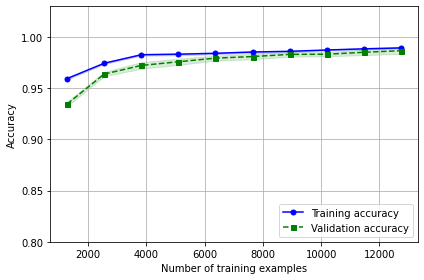

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve



lr= LogisticRegression(max_iter=1000,random_state=0,solver='lbfgs').fit(X_train_std,y_train2)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr,
                               X=X_train_std,
                               y=y_train2,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [ ]:
#lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

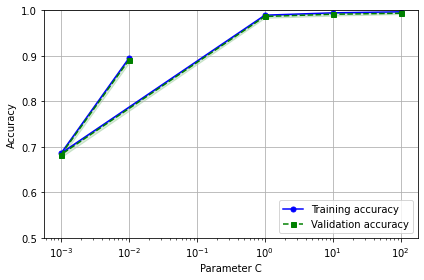

In [ ]:
from sklearn.model_selection import validation_curve

lr= LogisticRegression(max_iter=1000,random_state=0,solver='lbfgs').fit(X_train_std,y_train2)
param_range = [0.01,.001, 1,10.0,100]
train_scores, test_scores = validation_curve(
                estimator=lr, 
                X=X_train_std, 
                y=y_train2, 
                param_name='C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [ ]:
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=1000,random_state=0,solver='lbfgs',C = 10,n_jobs=2).fit(X_train_std,y_train2)


In [ ]:
# make predictions with logistic regression
yhat = lr.predict(X_val_std)
# evaluate the predictions
# The evaluation for two features using logistic regression is about 89% which is fair
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.992


In [ ]:
len(X_test_std)

In [ ]:
len(df_final.columns)

24

In [ ]:
1/((24)*X_train_std.var())

0.041666666666666664

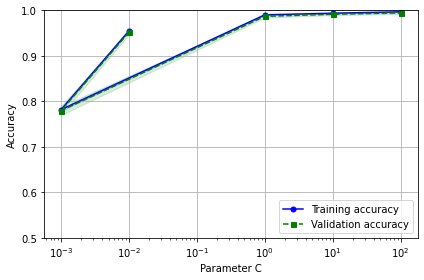

In [ ]:
from sklearn.model_selection import SVC
svm = SVC(kernel='linear', random_state=1)
from sklearn.model_selection import validation_curve
param_range = [0.01,.001, 1,10.0,100]
train_scores, test_scores = validation_curve(
                estimator=svm, 
                X=X_train_std, 
                y=y_train2, 
                param_name='C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

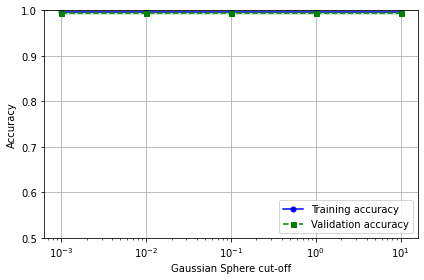

In [ ]:
svm = SVC(kernel='linear', C=100, random_state=1)

param_range = [10,1, 0.1,0.01,0.001]
train_scores, test_scores = validation_curve(
                estimator=svm, 
                X=X_train_std, 
                y=y_train2, 
                param_name='gamma', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Gaussian Sphere cut-off')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=1,gamma = 0.001)
svm.fit(X_train_std,y_train2)



SVC(C=100, gamma=0.001, kernel='linear', random_state=1)

In [ ]:
yhat = svm.predict(X_val_std)
# evaluate the predictions
# The evaluation for two features using logistic regression is about 89% which is fair
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.996


In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=100)
svm.fit(X_train_std, y_train2)


SVC(C=100, gamma=0.001, random_state=1)

In [ ]:
yhat = svm.predict(X_val_std)
# evaluate the predictions
# The evaluation for two features using Non linear SVM is about 90% which is fair
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.981


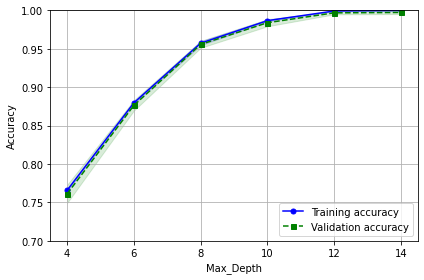

In [ ]:
from sklearn.model_selection import validation_curve

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    random_state=1)
param_range = [4,6,8,10,12,14]
train_scores, test_scores = validation_curve(
                estimator=tree_model, 
                X=X_train_std, 
                y=y_train2, 
                param_name='max_depth', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [ ]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=12, 
                                    random_state=1)
tree_model.fit(X_train_std, y_train2)

DecisionTreeClassifier(max_depth=12, random_state=1)

In [ ]:
yhat = tree_model.predict(X_val_std)
# evaluate the predictions
# The evaluation for two features using Decision Tree is about 90% which is fair
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.998


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score


start_time = datetime.now()


bag = bag.fit(X_train_std, y_train2)
y_train_pred = bag.predict(X_train_std)
y_test_pred = bag.predict(X_test_std)

bag_train = accuracy_score(y_train2, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Bagging train/test accuracies 1.000/0.998
Duration: 0:00:13.547229
